In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# load data
data = pd.read_csv("../datasets/clustering_bank_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


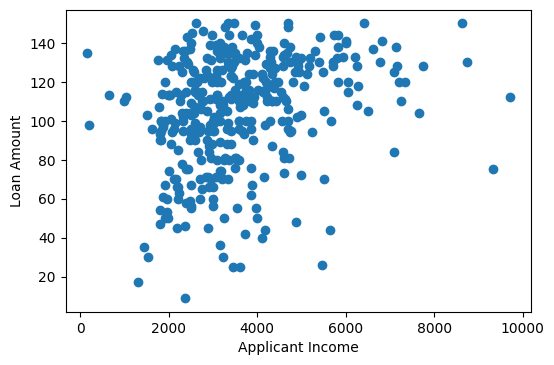

In [3]:
# just consider two features: ApplicantIncome and LoanAmount
plt.scatter(data["ApplicantIncome"], data["LoanAmount"])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [4]:
# since k-means involves distance function, let us apply scalling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["ApplicantIncome", "LoanAmount"]])

In [5]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [6]:
kmeans.cluster_centers_

array([[-0.35418382, -1.44606282],
       [ 1.37900514,  0.63201673],
       [-0.44162956,  0.38517565]])

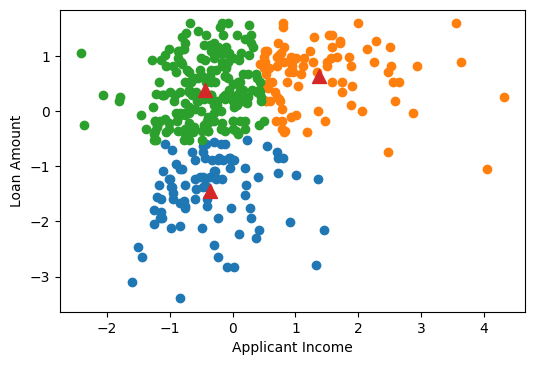

In [7]:
plt.scatter(data_scaled[:, 0][kmeans.labels_ == 0], data_scaled[:, 1][kmeans.labels_ == 0])
plt.scatter(data_scaled[:, 0][kmeans.labels_ == 1], data_scaled[:, 1][kmeans.labels_ == 1])
plt.scatter(data_scaled[:, 0][kmeans.labels_ == 2], data_scaled[:, 1][kmeans.labels_ == 2])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="^", s=100)
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()